## Classification using Naive Baye's 

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Raghuram\Downloads\Subrahmanyam\Naive bayes\SalaryData_Train.csv",encoding = "ISO-8859-1")

In [2]:
data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- person relation status
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
**Salary -- salary of an individual(Dependent variable)


## EDA 

In [3]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.shape

(30161, 14)

In [7]:
data['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [8]:
data['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [9]:
data['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [10]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
data['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [12]:
data['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [13]:
data['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

# One hot encoding & label encoding

In [14]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])

In [17]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


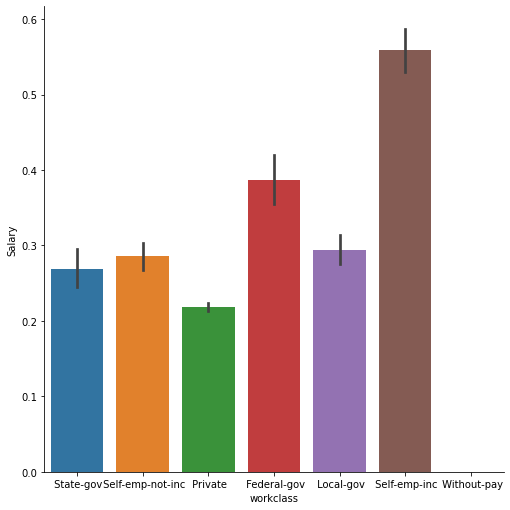

In [18]:
import seaborn as sns
sns.catplot(x="workclass", y="Salary", kind="bar",height=7, data=data)

<AxesSubplot:xlabel='count', ylabel='education'>

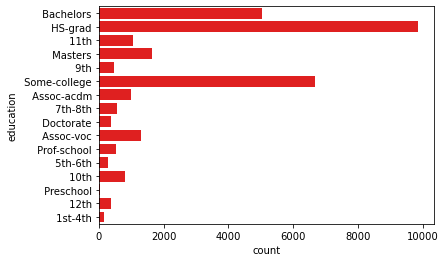

In [19]:
sns.countplot(y="education", data=data, color="r")

<AxesSubplot:xlabel='count', ylabel='workclass'>

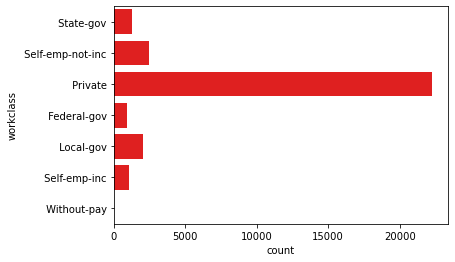

In [20]:
sns.countplot(y="workclass", data=data, color="r")

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

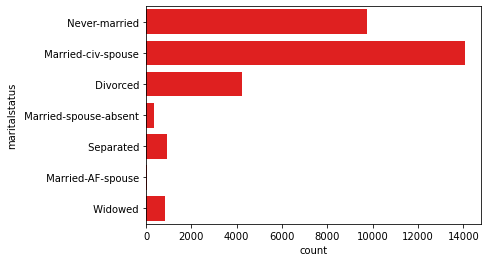

In [21]:
sns.countplot(y="maritalstatus", data=data, color="r")

<AxesSubplot:xlabel='count', ylabel='occupation'>

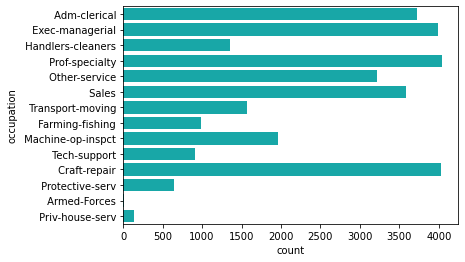

In [22]:
sns.countplot(y="occupation", data=data, color="c")

<AxesSubplot:xlabel='Salary', ylabel='count'>

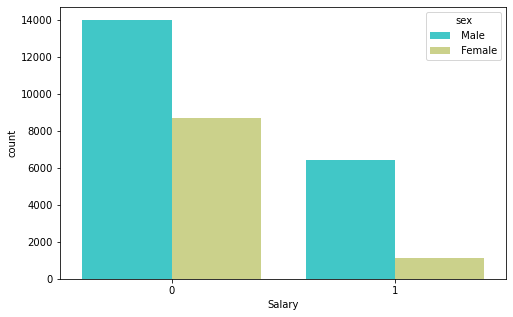

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x='Salary',data=data,palette='rainbow',hue='sex')

<AxesSubplot:xlabel='Salary', ylabel='age'>

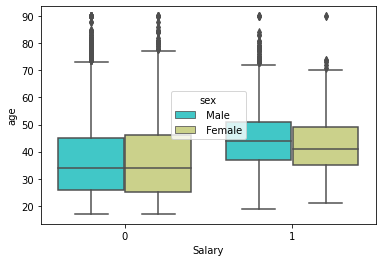

In [24]:
sns.boxplot(x='Salary',y='age',hue='sex',data=data, palette='rainbow')

In [25]:
data= pd.get_dummies(data)

In [26]:
data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


###  train_test_split of data

In [28]:
from sklearn.model_selection import train_test_split

i_train,i_test = train_test_split(data,test_size=0.2)

In [29]:
i_train

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
17041,36,9,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6068,19,10,0,0,35,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27437,41,15,0,2415,55,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
22428,32,13,99999,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27324,36,12,0,0,55,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25609,24,13,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
485,38,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15170,34,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10775,64,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
i_test

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
5904,20,7,0,1573,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
18385,58,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22813,32,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25507,38,9,0,0,60,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20882,60,14,0,0,50,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13232,51,9,0,0,35,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24262,44,13,0,2258,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25214,19,10,0,0,12,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3503,46,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
test= i_test.drop(['Salary'],axis=1)

In [32]:
train = i_train.drop(['Salary'],axis =1)

# Multi nominal Naive bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
import numpy as np

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train,i_train.Salary)
train_pred_m = classifier_mb.predict(train)
accuracy_train_m = np.mean(train_pred_m==i_train.Salary) # 98%
accuracy_train_m
 

0.7723391909814323

In [34]:
test_pred_m = classifier_mb.predict(test)
accuracy_test_m = np.mean(test_pred_m==i_test.Salary)
accuracy_test_m

0.775236200895077

# Gaussian Naive bayes

In [35]:
classifier_gb = GB()
classifier_gb.fit(train,i_train.Salary.values) 
train_pred_g = classifier_gb.predict(train)
accuracy_train_g = np.mean(train_pred_g==i_train.Salary)
accuracy_train_g

0.8000663129973474

In [36]:
test_pred_g = classifier_gb.predict(test)
accuracy_test_g = np.mean(test_pred_g==i_test.Salary) 
accuracy_test_g

0.79678435272667

# Naive bayes model when train and test datasets are different

In [37]:
train1 =data

In [38]:
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
train = train1.drop(['Salary'],axis=1)

In [40]:
train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df = pd.read_csv(r"C:\Users\Raghuram\Downloads\Subrahmanyam\Naive bayes\SalaryData_Test.csv",encoding = "ISO-8859-1")

In [42]:
test1 = df

In [43]:
labelencoder = LabelEncoder()
test1.iloc[:,-1] = labelencoder.fit_transform(test1.iloc[:,-1])

In [44]:
test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [45]:
test = pd.get_dummies(test1)

In [46]:
test

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
test1 = test.drop(['Salary'],axis=1)

## Multi nominal Naive bayes

In [48]:
classifier_mb = MB()
classifier_mb.fit(train,train1.Salary)
train_pred_m = classifier_mb.predict(train)
accuracy_train_m = np.mean(train_pred_m==train1.Salary) # 98%
accuracy_train_m
 

0.7729186698053778

In [49]:
test_pred_m = classifier_mb.predict(test1)
accuracy_test_m = np.mean(test_pred_m==test.Salary)
accuracy_test_m

0.7749667994687915

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_pred_m,test.Salary)
print (confusion_matrix)

[[10891  2920]
 [  469   780]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_pred_m,test.Salary))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     13811
           1       0.21      0.62      0.32      1249

    accuracy                           0.77     15060
   macro avg       0.58      0.71      0.59     15060
weighted avg       0.90      0.77      0.82     15060



## Guassian naive bayes

In [52]:
classifier_gb = GB()
classifier_gb.fit(train,train1.Salary.values) 
train_pred_g = classifier_gb.predict(train)
accuracy_train_g = np.mean(train_pred_g==train1.Salary)
accuracy_train_g

0.8031563940187659

In [53]:
test_pred_g = classifier_gb.predict(test1)
accuracy_test_g = np.mean(test_pred_g==test.Salary) 
accuracy_test_g

0.8029216467463479

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_pred_g,test.Salary))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9754
           1       0.82      0.57      0.67      5306

    accuracy                           0.80     15060
   macro avg       0.81      0.75      0.76     15060
weighted avg       0.80      0.80      0.79     15060

